## Impact of the parameters: Jet opening angle

Here is studied a more realistic case:
* z=0.1
* source spectrum is generated assuming a powerlaw spectrum (between Emin=1MeV and Emax=100TeV)
* EGMF (turbulent magnetic field): 1E-15 Gauss, L_B= 1 Mpc
* EBL model: Dominguez

This part shows the impact on the halo effect if we play with the jet opening angle.

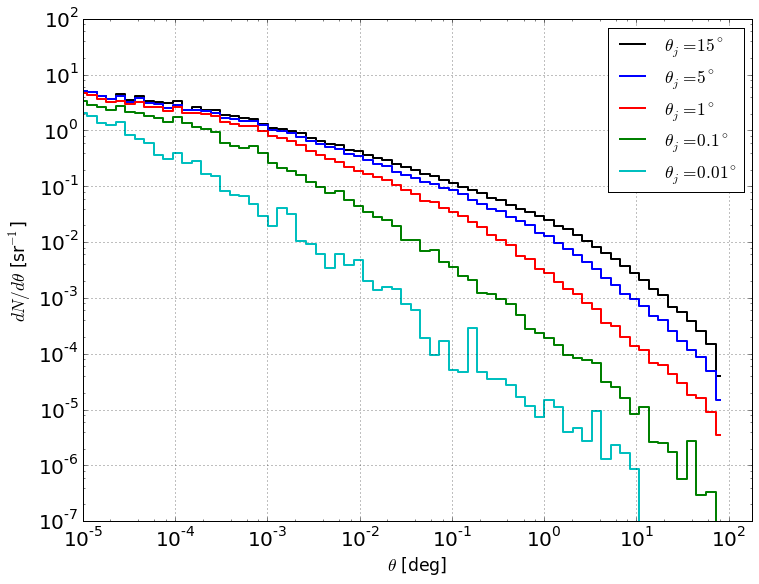

In [55]:
%matplotlib inline
import modules.spectrum
import modules.arrival_angle
import modules.timing
simu = ["theta_j=15","theta_j=5","theta_j=1","theta_j=0.1","theta_j=0.01"]
modules.spectrum.drawSpectrum(simu,colors=['k','b','r','g','c','m','y'])
modules.arrival_angle.drawArrivalAngle(simu,colors=['k','b','r','g','c','m','y'])
modules.timing.drawTiming(simu,colors=['k','b','r','g','c','m','y'])

In [2]:
from numpy import zeros, size, nditer, average, savetxt, set_printoptions
from modules.read import select_events
from modules.analytic import degre, yr

Redshifts=["0.04","0.14","0.4","1","2"]
opening_angle = [90,75,60,45,30,15,10,5,2,1,0.7,0.5,0.1,1e-2] # degres 
powerlaw_index=1.2

def compute_theta_mean(i,j):
   if i==0:
      if j==0:
         theta_mean[i,j]=0
         dt_mean[i,0]=0
      else:
         theta_mean[i,j]=opening_angle[j-1]
         dt_mean[i,j]=opening_angle[j-1]
   else:
      if j==0:
         theta_mean[i,j]=float(Redshifts[i-1])
      else:
         fileId="Simulations/z="+Redshifts[i-1]+"/EGMF=1e-15G"
         weight, energy, time, theta_arrival, theta, phi, generation, Esource = select_events(fileId,Erange=[10,1e2],powerlaw_index=1.2,jet_opening=opening_angle[j-1])
         #weight, energy, time, theta_arrival, theta, phi = select_events(fileId,Erange=[10,1e2],powerlaw_index=1.2,jet_opening=opening_angle[j-1], generation=2)
         theta_mean[i,j]=average(theta_arrival,weights=weight)/degre
         dt_mean[i,j]=average(time,weights=weight)/yr
   
theta_mean=zeros((size(Redshifts)+1,size(opening_angle)+1))
dt_mean=theta_mean.copy()
it=nditer(theta_mean, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
   compute_theta_mean(it.multi_index[0],it.multi_index[1])
   it.iternext()
    
set_printoptions(precision=3)
print(theta_mean)

savetxt("Results/theta_mean_vs_jet_opening.dat",theta_mean,fmt='%1.4e')
savetxt("Results/delay_mean_vs_jet_opening.dat",dt_mean,fmt='%1.4e')

[[  0.000e+00   9.000e+01   7.500e+01   6.000e+01   4.500e+01   3.000e+01
    1.500e+01   1.000e+01   5.000e+00   2.000e+00   1.000e+00   7.000e-01
    5.000e-01   1.000e-01   1.000e-02]
 [  4.000e-02   5.288e-01   5.287e-01   5.243e-01   5.209e-01   5.046e-01
    4.837e-01   4.684e-01   4.330e-01   3.590e-01   2.980e-01   2.704e-01
    2.493e-01   1.524e-01   5.970e-02]
 [  1.400e-01   3.306e-01   3.280e-01   3.185e-01   3.061e-01   2.928e-01
    2.736e-01   2.392e-01   2.135e-01   1.591e-01   1.263e-01   1.099e-01
    9.677e-02   6.119e-02   1.700e-02]
 [  4.000e-01   9.402e-02   9.373e-02   9.048e-02   8.603e-02   8.034e-02
    5.995e-02   5.605e-02   4.955e-02   3.303e-02   2.154e-02   1.722e-02
    1.367e-02   3.746e-03   4.409e-04]
 [  1.000e+00   2.157e-02   1.904e-02   1.850e-02   1.846e-02   1.315e-02
    1.155e-02   1.051e-02   9.332e-03   7.151e-03   5.021e-03   3.960e-03
    3.033e-03   7.430e-04   5.331e-05]
 [  2.000e+00   5.441e-03   5.300e-03   4.728e-03   4.728e-03   4

In [1]:
%matplotlib inline
from matplotlib.pyplot import figure, show, setp
from matplotlib import gridspec
from numpy import loadtxt, sin, arcsin, size
from modules.analytic import distance, lambda_gg

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

fig1 = figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1]) 
fig1.subplots_adjust(hspace=0)
ax1 = fig1.add_subplot(gs[0])
ax2 = fig1.add_subplot(gs[1],sharex=ax1)

theta_mean = loadtxt("Results/theta_mean_vs_jet_opening.dat")
dt_mean = loadtxt("Results/delay_mean_vs_jet_opening.dat")
Redshifts = theta_mean[1:,0]
i=1
for z in Redshifts:
    p, = ax1.plot(theta_mean[0,1:],theta_mean[i,1:],'--*',linewidth=2)
    #ax1.plot(theta_mean[0,1:],abs(arcsin(sin(theta_mean[0,1:])*lambda_gg(1e5,z)[1]/distance(z)[1])),'-.',color=p.get_color(),linewidth=2)
    ax2.plot(dt_mean[0,1:],dt_mean[i,1:],'--*',color=p.get_color(),linewidth=2,label="z=%1.2f"%float(z))
    i+=1    

ax1.set_xscale('log')   
ax1.set_yscale('log')
#ax1.set_ylim([0.5e-6,10])
ax1.grid(b=True,which='major')
#ax1.legend(loc="best")
ax1.set_xlabel("$\\lambda_B$ [Mpc]",fontsize="xx-large")
ax1.set_ylabel("average arrival angle [degre]",fontsize="xx-large")
xticklabels = ax1.get_xticklabels()
setp(xticklabels, visible=False)

ax2.set_xscale('log')   
ax2.set_yscale('log')
#ax2.set_ylim([1e4,0.5e8])
ax2.grid(b=True,which='major')
ax2.legend(loc="best",fontsize="xx-large")
ax2.set_xlabel("$\\theta_{jet}$ [degre]",fontsize="xx-large")
ax2.set_ylabel("average time delay [yrs]",fontsize="xx-large")   

show()

In [10]:
%matplotlib inline
from numpy import zeros, size, nditer, average, set_printoptions
from matplotlib.pyplot import figure, show
from modules.read import select_events
from modules.analytic import degre, distance
 
import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

Redshifts=["0.13"]
opening_angle = [90,75,60,45,30,15,10,5,2,1,0.7,0.5,0.1,1e-2] # degres 

def compute_theta_mean(i,j):
   if i==0:
      if j==0:
         theta_mean[i,j]=0
      else:
         theta_mean[i,j]=opening_angle[j-1]
   else:
      if j==0:
         theta_mean[i,j]=float(Redshifts[i-1])
      else:
         fileId="Simulations/simple case/EGMF=1e-15G"
         #fileId = "simple case - z="+Redshifts[i-1]
         #weight, energy, time, theta_arrival, theta, phi, generation = select_events(fileId,Erange=[10,1e2],powerlaw_index=1.2,jet_opening=opening_angle[j-1])
         weight, energy, time, theta_arrival, theta, phi = select_events(fileId,Erange=[10,1e2],powerlaw_index=1.2,jet_opening=opening_angle[j-1], generation=2)
         theta_mean[i,j]=average(theta_arrival,weights=weight)/degre
   
theta_mean=zeros((size(Redshifts)+1,size(opening_angle)+1))
it=nditer(theta_mean, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
   compute_theta_mean(it.multi_index[0],it.multi_index[1])
   it.iternext()
    
set_printoptions(precision=3)
print(theta_mean)

fig1 = figure(figsize=(12,9)) 
ax1 = fig1.add_subplot(111) 

Redshifts   = theta_mean[1:,0]
i=1
for z in Redshifts:
    p, = ax1.plot(theta_mean[0,1:],theta_mean[i,1:],'--*',linewidth=2,label="z=%.2f"%float(z))
    ax1.plot(theta_mean[0,1:],abs(arcsin(sin(theta_mean[0,1:])/distance(z)[1])),'-.',color=p.get_color(),linewidth=2)
    i+=1

ax1.set_xscale('log')   
ax1.set_yscale('log')
ax1.grid(b=True,which='major')
ax1.legend(loc="best",fontsize="xx-large")
ax1.set_xlabel("$\\theta_{jet}$ [degre]",fontsize="xx-large")
ax1.set_ylabel("average arrival angle [degre]",fontsize="xx-large")

show()

KeyboardInterrupt: 

Halo effect is also depending on the source jet opening angle. Figure  shows
the photons mean arrival angle in the GeV band versus the jet opening angle of the source assuming
that the jet is oriented toward the observer at different redshifts. Size of the halo appears to
increase with the jet opening angle but also with the distance. Indeed the ratio of the halo size
between a collimated jet ($\approx 0.1^\circ$) and a isotropic source ($=90^\circ$) is 4 - 5 at 
z=0.1 and 2 at z=2. Thus the halo of a far source is less influenced by the jet than a close one.


## Misaligned jet

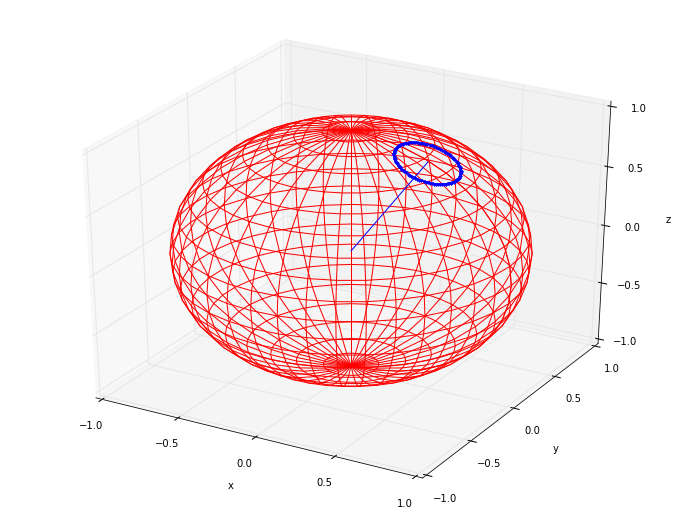

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
degre = np.pi/180
   
def test(tobs=0.5,tjet=0.3):
   # Plot a sphere in the observer spherical coordinates
   #----------------------------------------------------
   fig = plt.figure(figsize=(12,9))
   ax = plt.axes(projection='3d')    
   
   u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:21j]
   x=np.cos(u)*np.sin(v)
   y=np.sin(u)*np.sin(v)
   z=np.cos(v)
   ax.plot_wireframe(x, y, z, color="r")
    
   r = np.arange(0,1,.01)
   x=r*np.sin(tobs)*np.cos(0)
   y=r*np.sin(tobs)*np.sin(0)
   z=r*np.cos(tobs)
   ax.plot(x,y,z,color='b')
    

   # Circle in the spherical coordinates associated to the jet
   #----------------------------------------------------------
   # Number of points
   n = 100
   # Azimuthal angle Phi0
   pmin = 0
   pmax = 2*np.pi
   p0 = pmin + (pmax-pmin)*np.arange(n)/(n-1.)
   # Polar angle Theta0
   t0 = tjet*np.ones(n)
    
   # Circle in the spherical coordinates associates to the observer
   #---------------------------------------------------------------
   # Polar angle Theta
   st = np.cos(t0)*np.cos(tobs) + np.sin(t0)*np.sin(tobs)*np.cos(p0)
   t = np.arccos(st)
   # Azimuthal angle Theta
   sin_p = np.sin(t0)*np.sin(p0)/np.sin(t)
   p = np.arcsin(sin_p) 
   cos_p = ( -np.cos(t0)*np.sin(tobs) + np.sin(t0)*np.cos(tobs)*np.cos(p0))/np.sin(t)
   p[cos_p>0] = np.pi-p[cos_p>0]
    
   # Plot the circle
   #-----------------
   x = np.sin(t)*np.cos(p)
   y = np.sin(t)*np.sin(p)
   z = np.cos(t)
   ax.plot(x, y, z,marker='.')
   plt.xlim([-1,1])
   plt.ylim([-1,1])
   ax.set_zlim(-1,1)    
   plt.xlabel('x')
   plt.ylabel('y')
   ax.set_zlabel('z')
   plt.show()
   
test(tjet=0.2,tobs=0.5)

### Impact du $\theta_{obs}$

* étude en considérant un jet d'ouverture $\alpha_{jet}=5^\circ$
* on jouera sur $\theta_{obs}$ angle par rapport à l'observateur

In [13]:
from numpy import zeros, size, nditer, average, savetxt, set_printoptions
from modules.read import select_events
from modules.analytic import degre

Redshifts=["0.04","0.14","0.4","1","2"]
tobs = [0,0.001,0.005,0.02,0.05,0.1,0.2,0.5,0.8,1,2,5,8,10,20,40,60,180] # degres 
tjet = 5 # degres
powerlaw_index=1.2

def compute_theta_mean(i,j):
   if i==0:
      if j==0:
         theta_mean[i,j]=0
      else:
         theta_mean[i,j]=tobs[j-1]
   else:
      if j==0:
         theta_mean[i,j]=float(Redshifts[i-1])
      else:
         fileId="Simulations/z="+Redshifts[i-1]+"/EGMF=1e-15G"
         #fileId = "simple case - z="+Redshifts[i-1]
         weight, energy, time, theta_arrival, theta, phi, generation = select_events(fileId,Erange=[1,1e3],powerlaw_index=1.2,jet_opening=tjet,tobs=tobs[j-1])
         theta_mean[i,j]=average(theta_arrival,weights=weight)/degre
   
theta_mean=zeros((size(Redshifts)+1,size(tobs)+1))
it=nditer(theta_mean, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
   compute_theta_mean(it.multi_index[0],it.multi_index[1])
   it.iternext()
    
set_printoptions(precision=3)
print(theta_mean)

savetxt("Results/theta_mean_vs_jet_direction.dat",theta_mean,fmt='%1.4e')

[[  0.000e+00   0.000e+00   1.000e-03   5.000e-03   2.000e-02   5.000e-02
    1.000e-01   2.000e-01   5.000e-01   8.000e-01   1.000e+00   2.000e+00
    5.000e+00   8.000e+00   1.000e+01   2.000e+01   4.000e+01   6.000e+01
    1.800e+02]
 [  4.000e-02   2.463e+00   2.466e+00   2.466e+00   2.467e+00   2.473e+00
    2.488e+00   2.524e+00   2.668e+00   2.842e+00   2.968e+00   3.674e+00
    6.144e+00   8.836e+00   1.069e+01   2.029e+01   4.000e+01   5.987e+01
    1.755e+02]
 [  1.400e-01   1.404e+00   1.407e+00   1.407e+00   1.412e+00   1.423e+00
    1.445e+00   1.499e+00   1.696e+00   1.919e+00   2.076e+00   2.919e+00
    5.674e+00   8.544e+00   1.049e+01   2.033e+01   4.020e+01   6.014e+01
    1.765e+02]
 [  4.000e-01   3.092e-01   3.103e-01   3.111e-01   3.164e-01   3.311e-01
    3.615e-01   4.332e-01   6.839e-01   9.561e-01   1.143e+00   2.105e+00
    5.062e+00   8.044e+00   1.004e+01   2.002e+01   3.999e+01   5.998e+01
    1.773e+02]
 [  1.000e+00   6.674e-02   6.737e-02   6.875e-02   

[ 0.04  0.14  0.4   1.    2.  ]


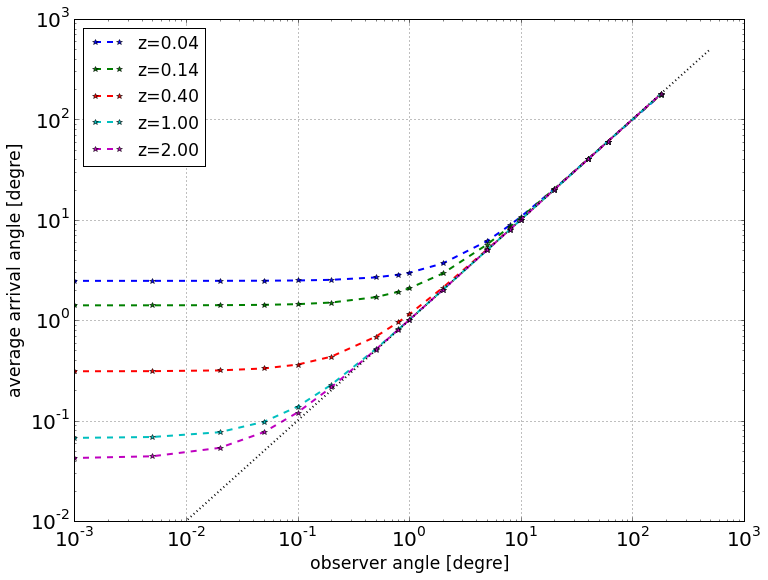

In [2]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import loadtxt, arange

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

fig1 = figure(figsize=(12,9)) 
ax1 = fig1.add_subplot(111) 

theta_mean = loadtxt("Results/theta_mean_vs_jet_direction.dat")
Redshifts   = theta_mean[1:,0]
i=1
for z in Redshifts:
    ax1.plot(theta_mean[0,1:],theta_mean[i,1:],'--*',linewidth=2,label="z=%.2f"%float(z))
    i+=1

x=arange(0,500)
ax1.plot(x,x,color='k',linewidth=2,linestyle=":")
   
ax1.set_xscale('log')   
ax1.set_yscale('log')
ax1.grid(b=True,which='major')
ax1.legend(loc="best",fontsize="xx-large")
ax1.set_xlabel("observer angle [degre]",fontsize="xx-large")
ax1.set_ylabel("average arrival angle [degre]",fontsize="xx-large")

show()

[ 0.98480571  0.98480595  0.9848066  ...,  0.98480775  0.98480777
  0.98480775]


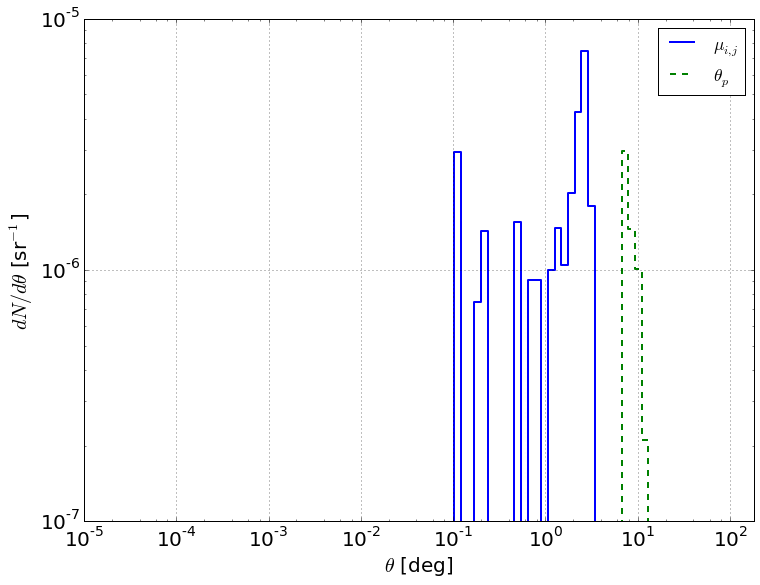

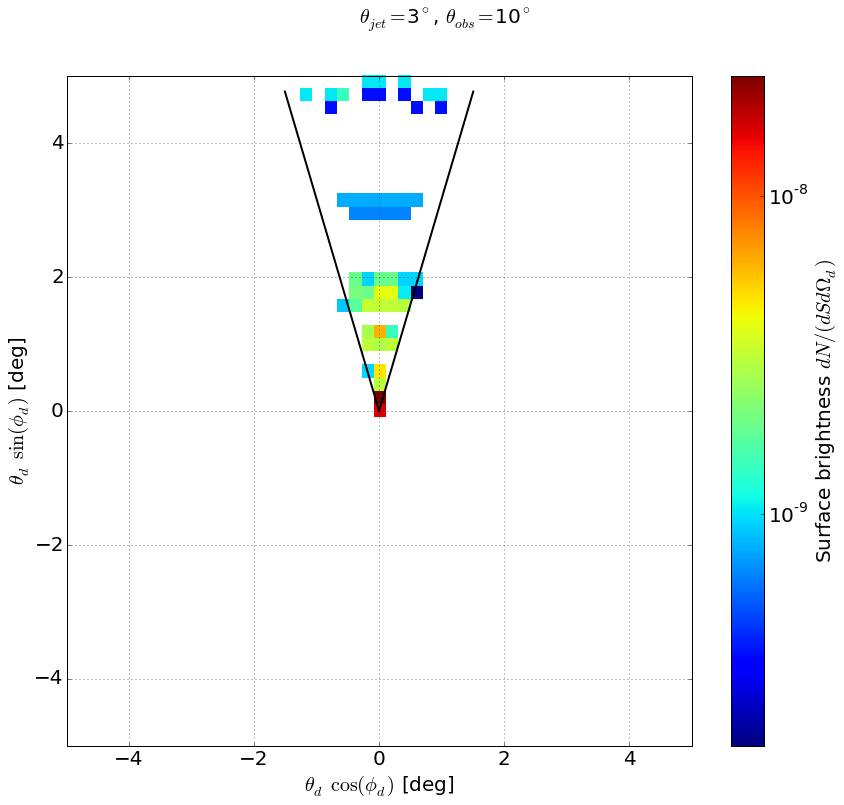

In [68]:
%matplotlib inline
from numpy import *
from modules.read import ReadProfile
from modules.analytic import degre, yr
from modules.arrival_angle import arrivalAngle

from matplotlib.pyplot import figure, show
from matplotlib.colors import LogNorm
from matplotlib import rcParams
label_size = 20
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size 

resultsFile="/results.dat"
profileFile="/profile.dat"

# READ SIMULATIONS FILES ==================================================================================================================
def select_events(simulation,Erange=[1e-3,1e6],delayrange=[-1,1e30],powerlaw_index=1,tjet=180.,tobs=0,generation='all',full_output=False):
   # 0 - generation
   # 1 - weight
   # 2 - energy [GeV]
   # 3 - time delay [s]
   # 4,5,6 - theta_pos, theta_dir, phi_dir [rad]
   # 7 - source photon energy [GeV]
   results = loadtxt(simulation+resultsFile,unpack=True)
   Dsource,redshift,n_phot  = ReadProfile(simulation,[2,3,4]) 

   try:
      gen_select = int(generation)
      cond = (results[0] == gen_select)
   except:
      # select photons only
      cond = (results[0]%2==0) 
   # energy selection
   cond = cond & (results[2]>=Erange[0]) & (results[2]<=Erange[1])
   # time selection
   cond  = cond & (results[3]/yr >= delayrange[0]) & (results[3]/yr <= delayrange[1])
   # Apply selection
   results = results[:,cond]

   # Apply source spectrum
   results[1] /= n_phot 
   if powerlaw_index != "":
      # compute intrinsic luminosity 
      powerlaw_index = float(powerlaw_index) 
      results[1]*= results[7]**(1-powerlaw_index)*log(Erange[1]/Erange[0])
      if powerlaw_index == 2:
         results[1] /= log(Erange[1]/Erange[0])
      else:
         results[1] *= (2-powerlaw_index)/(Erange[1]**(2-powerlaw_index)-Erange[0]**(2-powerlaw_index))

   # misaligned jet & jet opening angle selection 
   results = append(results,zeros((2,size(results,axis=1))),axis=0)
   phi_dj = 0
   results[8] = phi_dj
   results[9] = cos(tobs*degre)*cos(results[4])+sin(tobs*degre)*sin(results[4])*cos(phi_dj-results[6])
   tabi = results
   Nphi=100
   for phi_dj in linspace(-pi,pi,Nphi):
   #for phi_dj in 2*pi*random.rand(Nphi):
      results[8] = phi_dj
      results[9] = cos(tobs*degre)*cos(results[4])+sin(tobs*degre)*sin(results[4])*cos(phi_dj-results[6])
      tabi = append(tabi,results,axis=1)
   results = tabi     
   cond = (arccos(results[9])/degre < tjet)
   results = results[:,cond]
   
   results[1] /= (Nphi+1) * Dsource**2 *(2*pi*(1-cos(tjet*degre)))
   
   return results[1],results[2],results[3],results[4],results[5],results[8],results[0], results[9]
#============================================================================================================================================

def test(tobs=0,tjet=180,borne=[20,20]): # degres
   steps_by_degre = 5
   nbBins=steps_by_degre*2*borne[0]
   powerlaw_index=1.2

   fileId="Simulations/tests/mono"
   weight, energy, time, theta_p, theta_d, phi_d, generation, mu_ij = select_events(fileId,Erange=[1e0,1e5],tjet=tjet,tobs=tobs)
   
   ax0 = figure(figsize=(12,9)).add_subplot(111)
   th,dndtheta = arrivalAngle(arccos(mu_ij),weight,nbBins=100,theta_range=[1e-5,180])   
   ax0.plot(th/degre,dndtheta,drawstyle='steps-mid',linewidth=2,label="$\\mu_{i,j}$")   
   th,dndtheta = arrivalAngle(theta_p,weight,nbBins=100,theta_range=[1e-5,180])
   ax0.plot(th/degre,dndtheta,drawstyle='steps-mid',linestyle="--",linewidth=2,label="$\\theta_p$")
   ax0.legend(loc="best",fontsize='xx-large')
   ax0.set_xscale('log')
   ax0.set_yscale('log')
   ax0.set_xlim([1e-5,180])
   ax0.grid(b=True,which='major')
   ax0.set_xlabel("$\\theta$ [deg]",fontsize=20)
   ax0.set_ylabel("$dN/d\\theta$ [sr$^{-1}$]",fontsize=20)
                              
   fig = figure(figsize=(14,12))
   ax = fig.add_subplot(111) 

   step = 2*array(borne,dtype=float)/nbBins
   philim=float(borne[0])
   thetalim=float(borne[1])
   bining = array([int(2*philim/step[0])+1,int(2*thetalim/step[1])+1])
   limits = [[-thetalim,thetalim],[-philim,philim]]

   H,xedges,yedges,im = ax.hist2d(theta_d*cos(phi_d)/degre,theta_d*sin(phi_d)/degre,bining,weights=weight,norm=LogNorm(),range=limits)
   cbar=fig.colorbar(im, ax=ax)
   cbar.ax.set_ylabel("Surface brightness $dN/(dSd\\Omega_d)$",fontsize=label_size)
   
   th = linspace(0,5,100)
   phi_max = arccos(sqrt(1-(sin(tjet*degre)/sin(tobs*degre))**2))
   ax.plot(th*cos(pi/2-phi_max),th*sin(pi/2-phi_max),linewidth=2,color='k')
   ax.plot(-th*cos(pi/2-phi_max),th*sin(pi/2+phi_max),linewidth=2,color='k')
   
   ax.set_xlim((-borne[0],borne[0]))
   ax.set_ylim((-borne[1],borne[1]))
   ax.set_xlabel("$\\theta_d$ $\\cos(\\phi_d)$ [deg]",fontsize=label_size)
   ax.set_ylabel("$\\theta_d$ $\\sin(\\phi_d)$ [deg]",fontsize=label_size)
   fig.suptitle("$\\theta_{jet}=$%1.0f$^\\circ$, $\\theta_{obs}=$%1.0f$^\\circ$"%(tjet,tobs),fontsize=label_size)
   ax.grid(b=True,which='major')

   show()
   
test(tjet=3.,tobs=10,borne=[5,5])

In [3]:
from numpy import zeros, size, nditer, average, savetxt, set_printoptions
from modules.read import select_events
from modules.analytic import degre, yr

Redshifts=["0.04","0.14","0.4","1","2"]
tobs = [0,1,3,5,7,10,15,20,30] # degres 
powerlaw_index=1.2

def compute_theta_mean(i,j):
   if i==0:
      if j==0:
         theta_mean[i,j]=0
         dt_mean[i,0]=0
      else:
         theta_mean[i,j]=tobs[j-1]
         dt_mean[i,j]=tobs[j-1]
   else:
      if j==0:
         theta_mean[i,j]=float(Redshifts[i-1])
      else:
         fileId="Simulations/tests/z="+Redshifts[i-1]+"/EGMF=1e-15G"
         weight, energy, time, theta, phi, Esource, generation = select_events(fileId,Erange=[1,1e3],powerlaw_index=1.2,tjet=5,tobs=tobs[j-1])
         #weight, energy, time, theta_arrival, theta, phi = select_events(fileId,Erange=[10,1e2],powerlaw_index=1.2,jet_opening=opening_angle[j-1], generation=2)
         theta_mean[i,j]=average(theta,weights=weight)/degre
         dt_mean[i,j]=average(time,weights=weight)/yr
   
theta_mean=zeros((size(Redshifts)+1,size(tobs)+1))
dt_mean=theta_mean.copy()
it=nditer(theta_mean, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
   compute_theta_mean(it.multi_index[0],it.multi_index[1])
   it.iternext()
    
set_printoptions(precision=3)
print(theta_mean)

savetxt("Results/theta_mean_vs_tobs.dat",theta_mean,fmt='%1.4e')
savetxt("Results/delay_mean_vs_tobs.dat",dt_mean,fmt='%1.4e')

IndexError: index 9 is out of bounds for axis 0 with size 8